# A influência do tipo de parto e relação entre peso e duração da gestação  em óbitos fetais no estado de São Paulo entre 2006 e 2016

Nesse documento existem duas análises:

- Tipo de parto (nascimentos e óbitos)
- Peso e duração da gestação (nascimentos e óbitos)

In [17]:
# Importanto bibliotecas
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as ploter

In [28]:
# Definindo variáveis
df = {
    "obitos": {
        "pesoDuracao": pd.read_csv('obitos-fetais-peso-duracao-ocorrencia.csv'),
        "tipoAno": pd.read_csv('obitos-tipo-ano-ocorrencia.csv')
    },
    "nascimentos": {
        "pesoDuracao": pd.read_csv('nascidos-vivos-peso-duracao-ocorrencia.csv'),
        "tipoAno": pd.read_csv('nascidos-vivos-tipo-ano-ocorrencia.csv')
    }
}

# Configurando dataframes
df["obitos"]["pesoDuracao"].set_index("Peso ao nascer", inplace=True)
df["nascimentos"]["pesoDuracao"].set_index("Peso ao nascer", inplace=True)
df["obitos"]["tipoAno"].set_index("Tipo parto", inplace=True)
df["nascimentos"]["tipoAno"].set_index("Tipo de parto", inplace=True)

anos = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016]

## Tipo de parto

### Nascidos vivos por tipo de parto

O gráfico abaixo mostra a quantidade de nascimentos no período dos anos 2006 e 2016 por tipo de parto. Observa-se que as pessoas optam mais pelo tipo cesário.

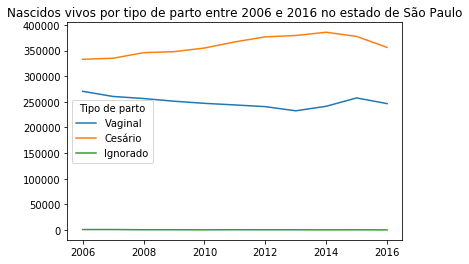

In [29]:
df["nascimentos"]["tipoAno"].transpose().set_index([anos]).plot.line(title="Nascidos vivos por tipo de parto entre 2006 e 2016 no estado de São Paulo")

### Nascidos vivos por tipo de parto em percentual

Para obter uma visualização melhor dos dados, abaixo o gráfico mostra os percentuais de escolha em relação os tipos de parto no período dos anos 2006 e 2016. Observa-se que a escolha pelo tipo cesário é aproximadamente 60%

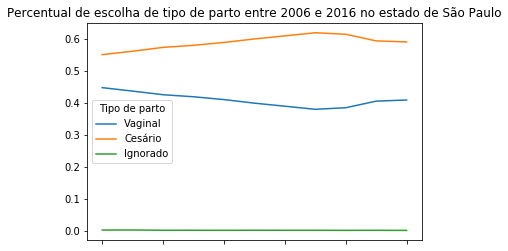

In [30]:
nascidos = df["nascimentos"]["tipoAno"].transpose()

nascidos['Total'] = nascidos["Cesário"] + nascidos["Vaginal"] + nascidos["Ignorado"]

nascidos["Cesário"] = nascidos["Cesário"].div(nascidos["Total"])
nascidos["Vaginal"] = nascidos["Vaginal"].div(nascidos["Total"])
nascidos["Ignorado"] = nascidos["Ignorado"].div(nascidos["Total"])

nascidos.drop(["Total"], axis=1, inplace=True)
nascidos.plot.line(title="Percentual de escolha de tipo de parto entre 2006 e 2016 no estado de São Paulo")

### Óbitos por tipo de parto

Apesar da escolha por parto cesário ser maior (aproximadamente 60%), a quantidade de óbitos pelo tipo de parto vaginal é maior que o tipo cesário.

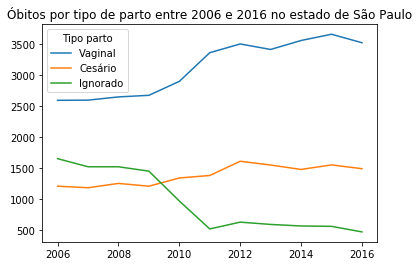

In [31]:
df["obitos"]["tipoAno"].transpose().set_index([anos]).plot.line(title="Óbitos por tipo de parto entre 2006 e 2016 no estado de São Paulo")

### Óbitos por tipo de parto em percentual

Neste gráfico temos o percentual, observa-se que o tipo de parto vaginal é responsável por mais de 60% dos óbitos fetais.

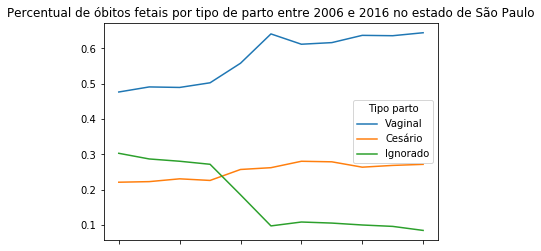

In [32]:
obitos = df["obitos"]["tipoAno"].transpose()

obitos['Total'] = obitos["Cesário"] + obitos["Vaginal"] + obitos["Ignorado"]

obitos["Cesário"] = obitos["Cesário"].div(obitos["Total"])
obitos["Vaginal"] = obitos["Vaginal"].div(obitos["Total"])
obitos["Ignorado"] = obitos["Ignorado"].div(obitos["Total"])

obitos.drop(["Total"], axis=1, inplace=True)

obitos.plot.line(title="Percentual de óbitos fetais por tipo de parto entre 2006 e 2016 no estado de São Paulo")

## Peso ao nascer e duração a gestação

### Relação de peso ao nascer e duracação da gestação no nascimento

Neste gráfico está claro quais os critérios para um nascimento vivo: **fetos de 2500g a 3999g de 37 a 41 semanas**. Apesar dessa área estar destacada, existem nascimentos vivos em todas as zonas, porém excepcionalmente raros.

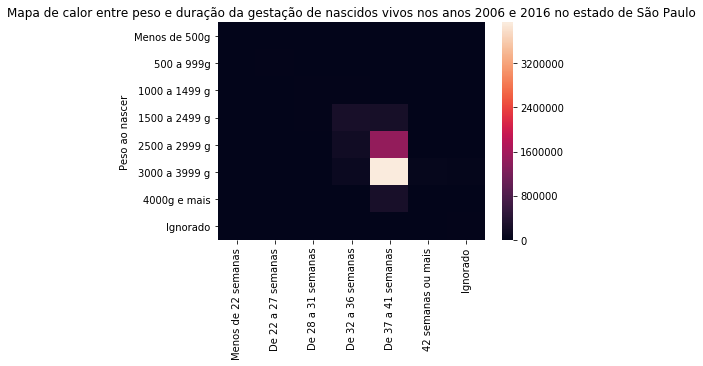

In [33]:
ax = ploter.axes()
ax.set_title('Mapa de calor entre peso e duração da gestação de nascidos vivos nos anos 2006 e 2016 no estado de São Paulo')
sb.heatmap(df["nascimentos"]["pesoDuracao"], ax=ax)

### Relação de peso ao nascer e duracação da gestação no óbito

No gráfico temos dois picos de óbitos com os dois critérios:

- fetos de 500 a 999g com 22 a 27 semanas de gestação (aprox. 9000 óbitos)
- fetos de 1500 a 2499g com 32 a 36 semanas de gestação (aprox. 7500 óbitos)

e duas zonas com índices medianos de óbitos (aprox. 4500 óbitos):

- fetos de 1000 a 1499g com 28 a 31 semanas 
- fetos de 3000 a 3999g com 37 a 41 semanas (zona que também possui maior percentual de nascimentos)

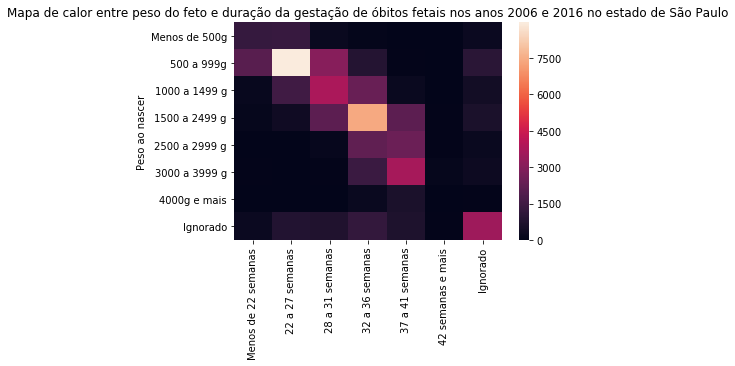

In [34]:
ax = ploter.axes()
ax.set_title('Mapa de calor entre peso do feto e duração da gestação de óbitos fetais nos anos 2006 e 2016 no estado de São Paulo')
sb.heatmap(df["obitos"]["pesoDuracao"], ax=ax)